# Heart Disease #

    This dataset contains medical data used for predicting heart disease. The data includes various attributes such as age, sex, chest pain type (cp), resting blood pressure (trestbps), cholesterol (chol), fasting blood sugar (fbs), resting electrocardiographic results (restecg), maximum heart rate achieved (thalach), exercise-induced angina (exang), and ST depression induced by exercise relative to rest (oldpeak). The data will be used to correctly predict heart disease, while also maintaining relevant information that can be used for interpretation.

    We will be employing several different learning models, including:
    1. Logistic Regression
    2. K-Nearest Neighbor (KNN)
    3. Support Vector Machine (SVM)
    4. Decision Tree
    5. Random Forest

    The Columns used are:
    age: Age of the patient (in years)
    sex: (1 = male, 0 = female)
    cp: Chest pain type (1-4)
    trestbps: Resting blood pressure (mm)
    chol: Serum cholesterol in mg/dl
    fbs: Fastin blood sugar > 120 mg/dl (1 = true, 0 = false)
    restecg: Resting electrocardiographic results (0-2)
    thalach: Maximum heart rate achieved
    exang: Exercise-induced angina (1 = yes, 0 = no)
    oldpeak: ST depression induced by exercise relative to reste to rest

### Importing Libraries ###

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Reading Data Set ###

In [16]:
df = pd.read_csv("C:/Users/lalde/Downloads/heart-disease.csv")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
print(df.shape)

(303, 14)


In [20]:
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


There are no categorical values

### Correlation Matrix ###

In [24]:
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.06

### Heatmap ###

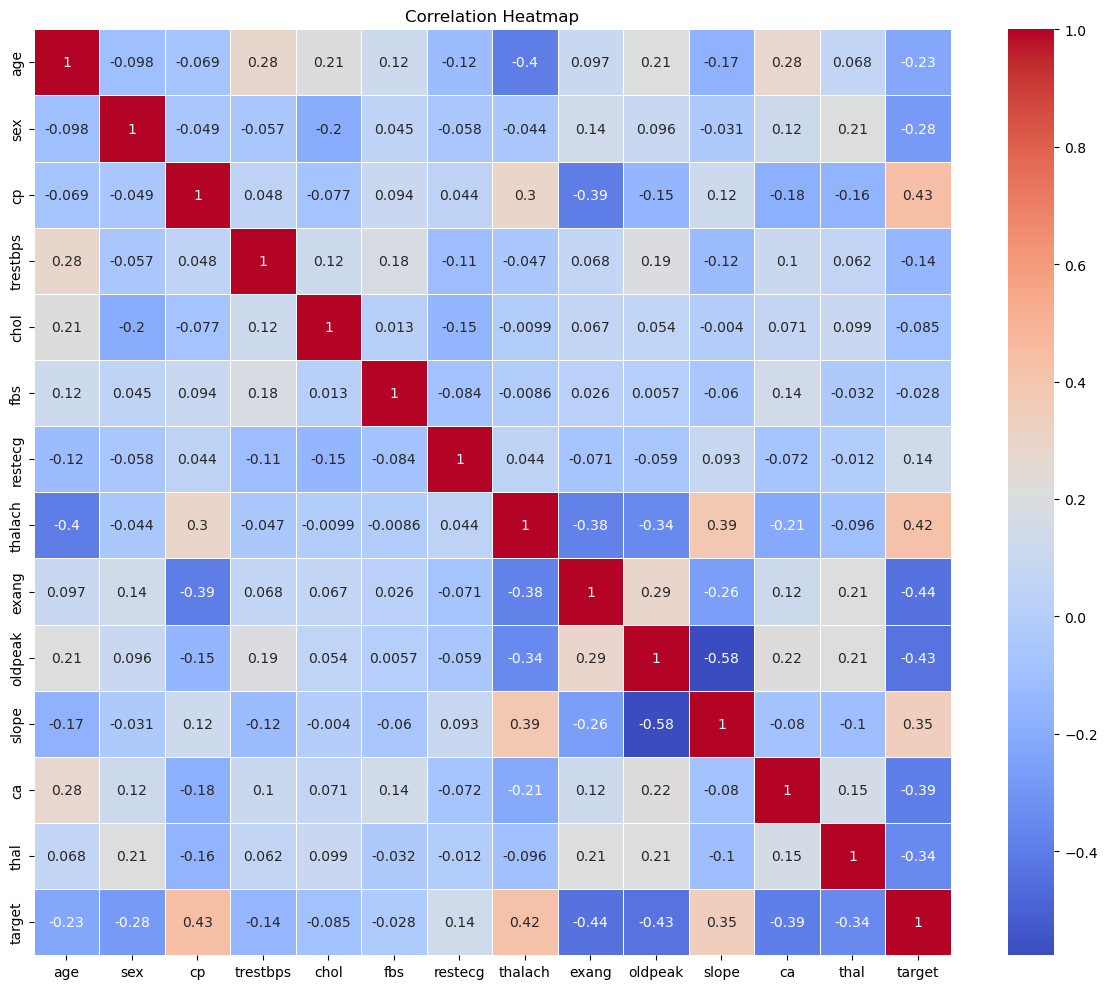

In [27]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


### Pairwise Correlations with Target Variable ###

In [30]:
target_correlations = correlation_matrix['target'].sort_values(ascending=False)
print("\nCorrelations with target variable:")
print(target_correlations)


Correlations with target variable:
target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


### Bar Plot ###

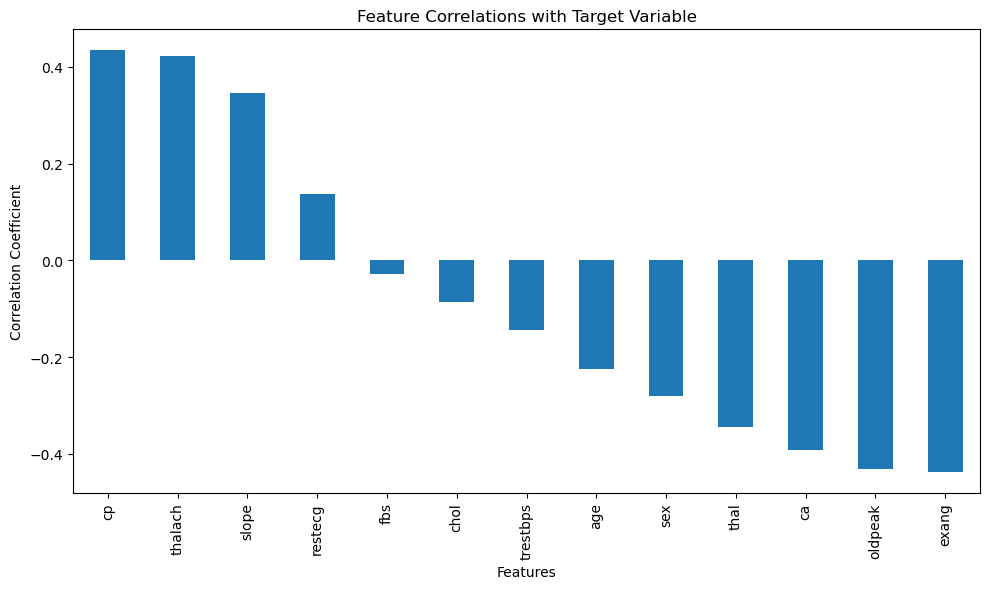

In [33]:
plt.figure(figsize=(10, 6))
target_correlations.drop('target').plot(kind='bar')
plt.title('Feature Correlations with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

### Finding Outliers ###

Outliers:
trestbps: 9 outliers
8      172
101    178
110    180
203    180
223    200
241    174
248    192
260    178
266    180
Name: trestbps, dtype: int64

chol: 5 outliers
28     417
85     564
96     394
220    407
246    409
Name: chol, dtype: int64

fbs: 45 outliers
0      1
8      1
14     1
23     1
26     1
28     1
29     1
36     1
60     1
64     1
76     1
78     1
83     1
87     1
90     1
93     1
97     1
99     1
103    1
106    1
111    1
136    1
137    1
169    1
170    1
176    1
197    1
203    1
214    1
215    1
217    1
219    1
222    1
223    1
231    1
251    1
252    1
260    1
269    1
278    1
281    1
282    1
292    1
297    1
300    1
Name: fbs, dtype: int64

thalach: 1 outliers
272    71
Name: thalach, dtype: int64

oldpeak: 5 outliers
101    4.2
204    6.2
221    5.6
250    4.2
291    4.4
Name: oldpeak, dtype: float64

ca: 25 outliers
52     3
92     4
97     3
99     3
158    4
163    4
164    4
165    3
181    3
191    3
204    3
208    3
217   

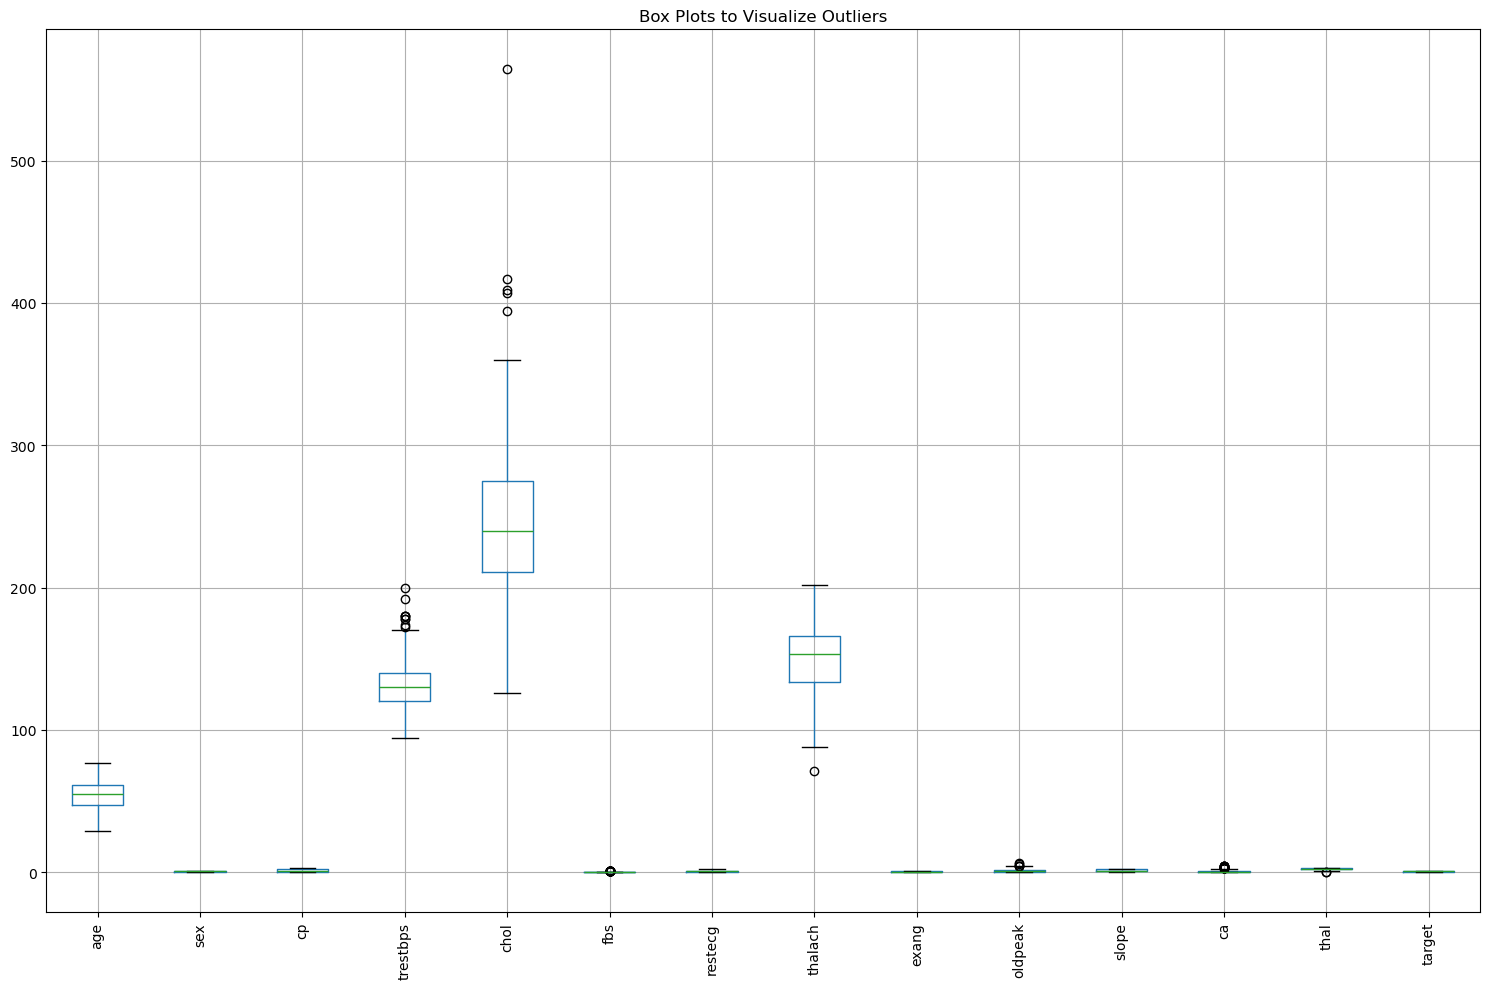

In [36]:
def find_outliers(df):
    outliers = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index.tolist()
    return outliers

# Find outliers
outliers = find_outliers(df)

# Print outliers
print("Outliers:")
for column, indices in outliers.items():
    if indices:
        print(f"{column}: {len(indices)} outliers")
        print(df.loc[indices, column])
        print()

# Visualize outliers with box plots
plt.figure(figsize=(15, 10))
df.boxplot()
plt.title('Box Plots to Visualize Outliers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Remove Outliers ###

Original dataset shape: (303, 14)
Dataset shape after removing outliers: (228, 14)


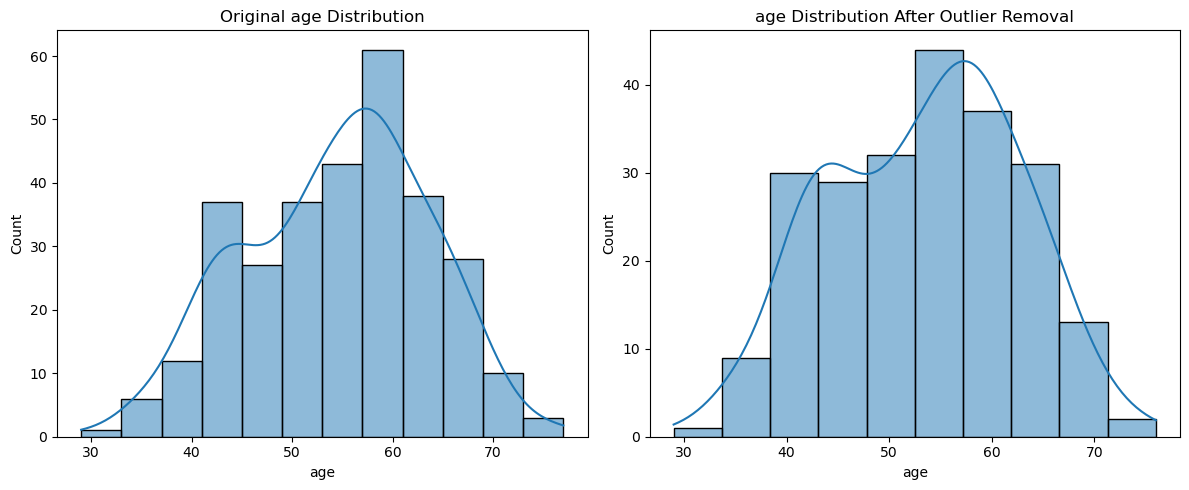

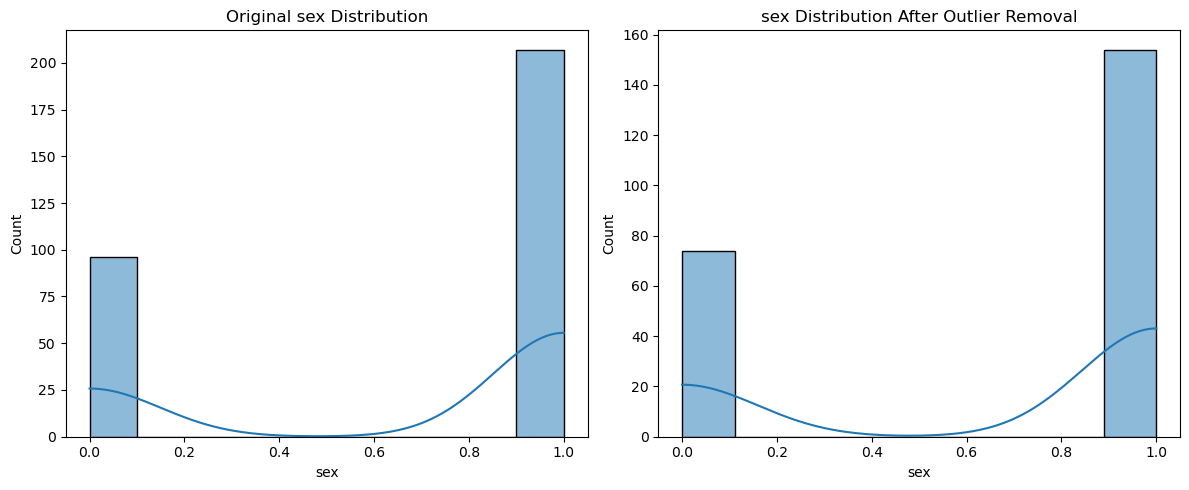

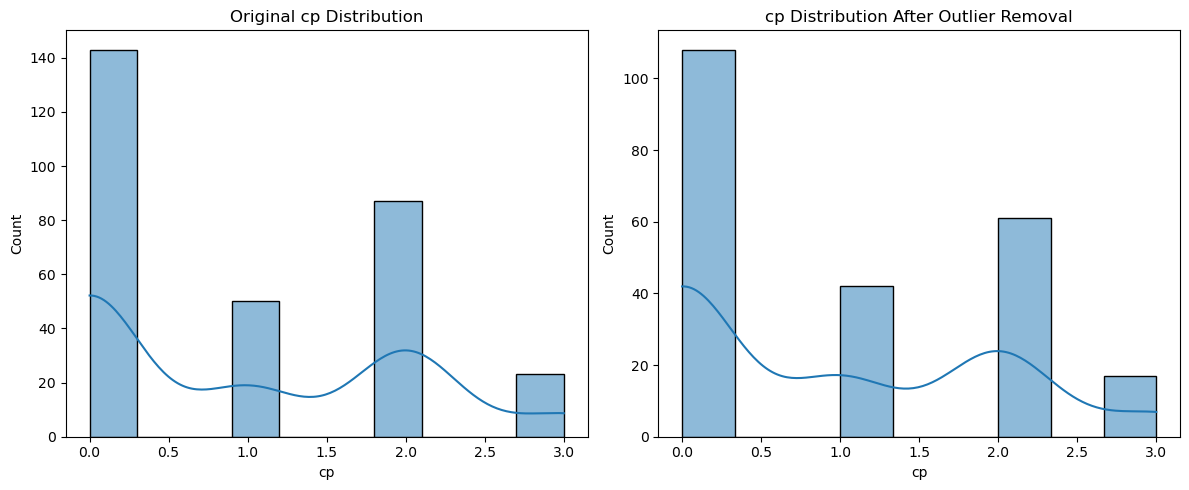

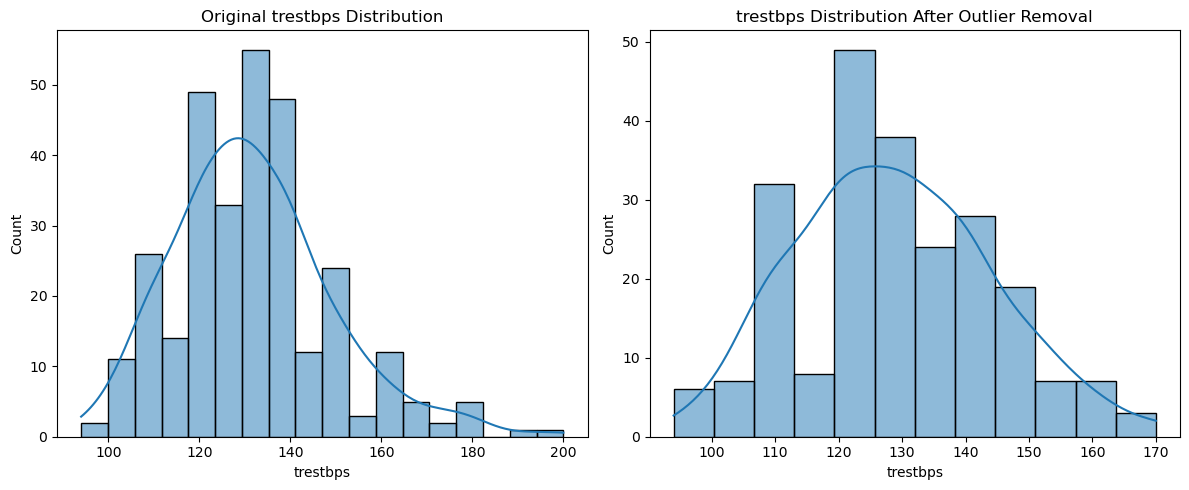

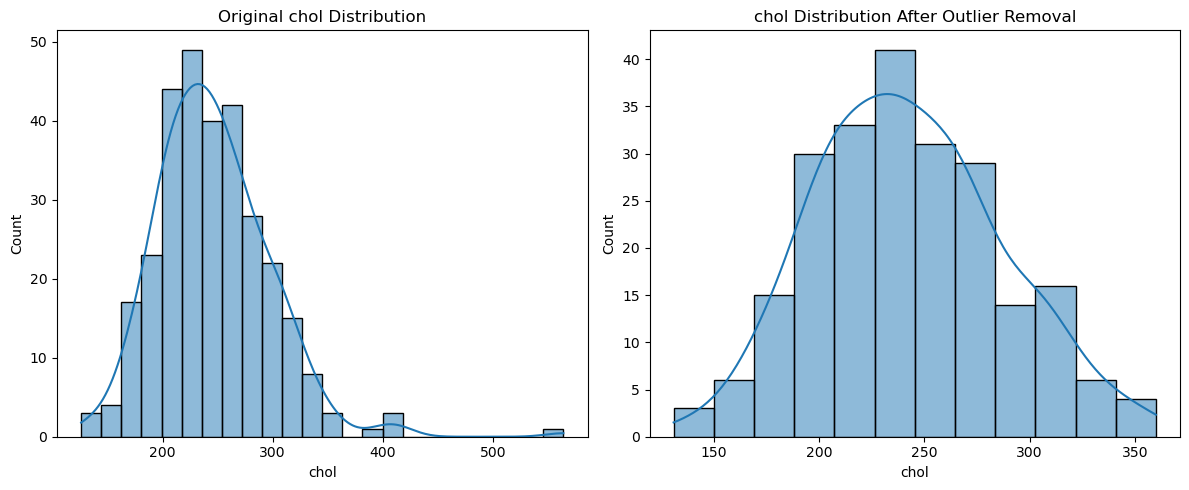

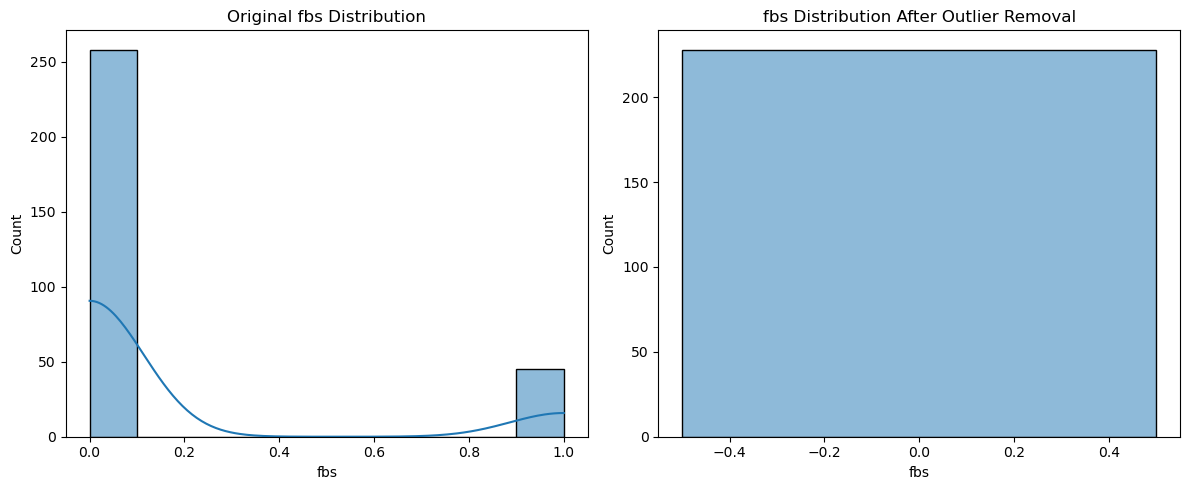

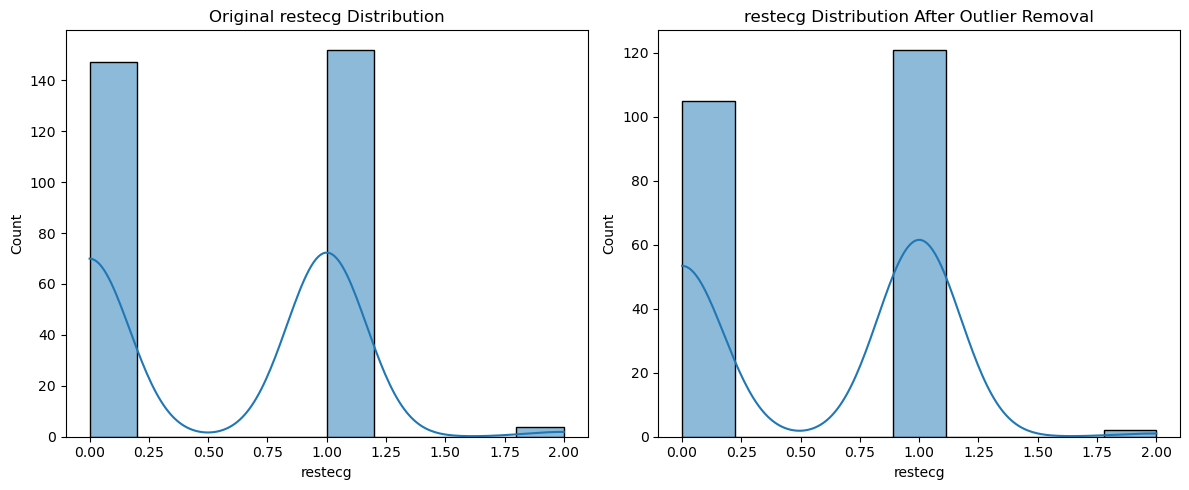

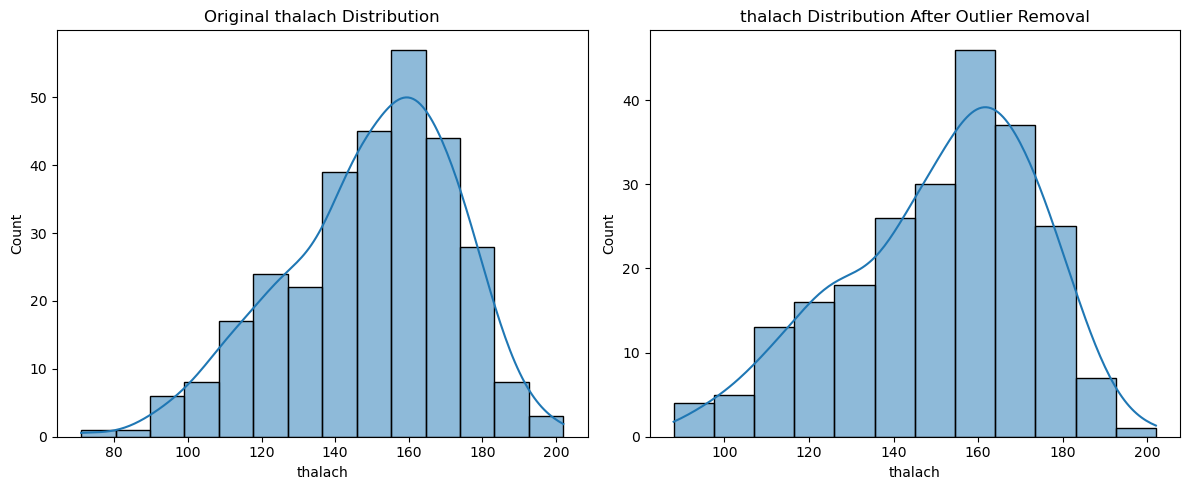

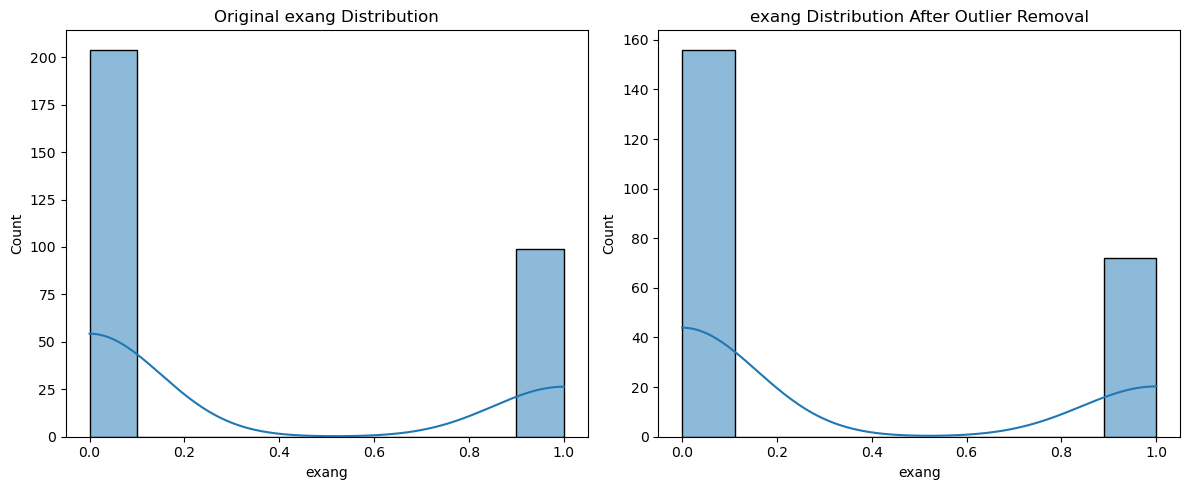

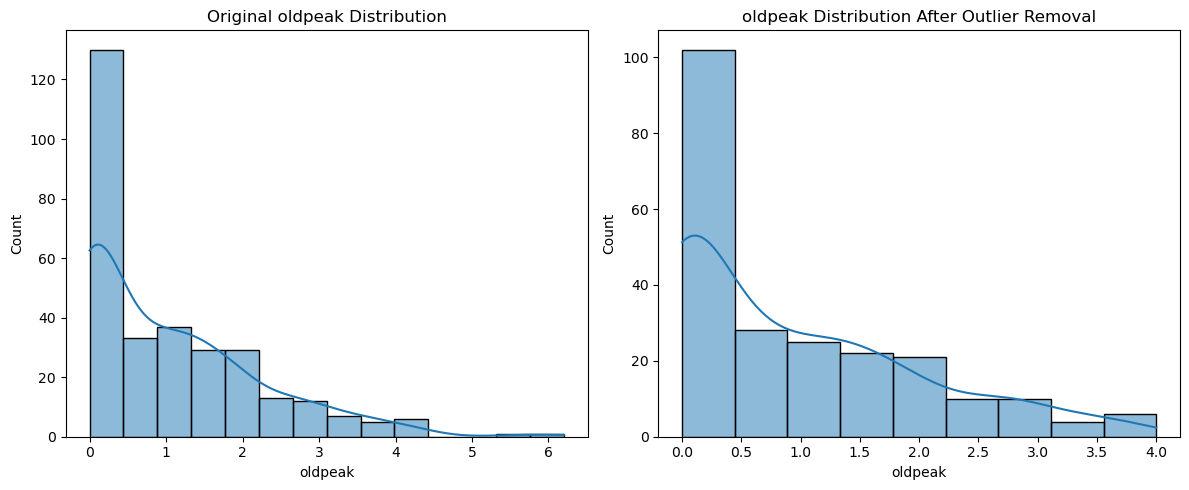

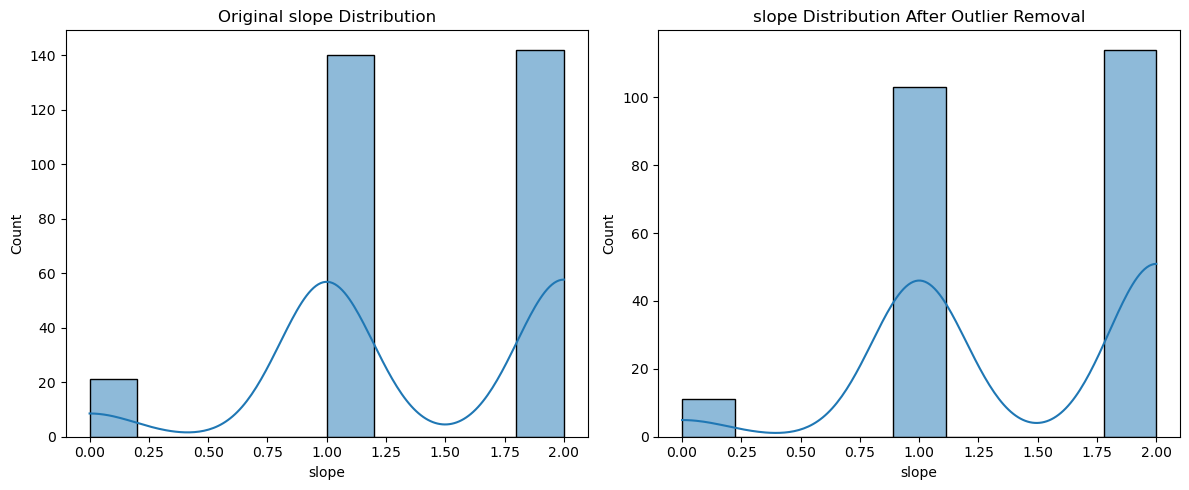

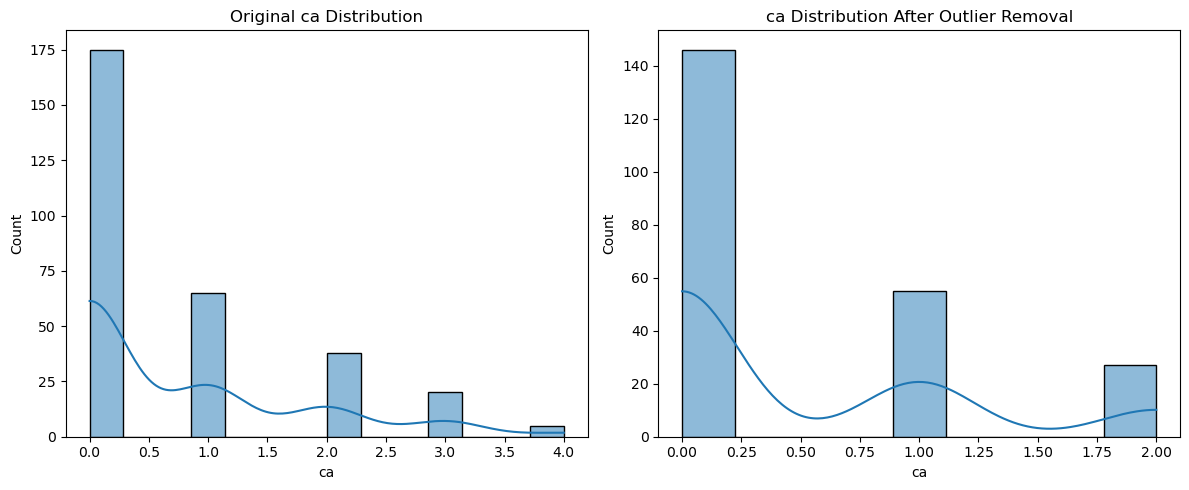

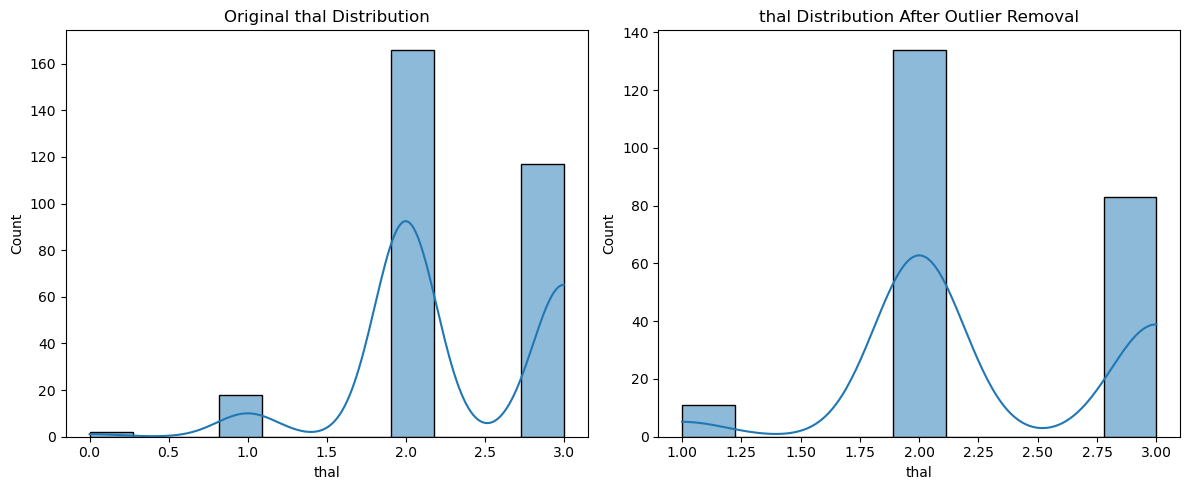

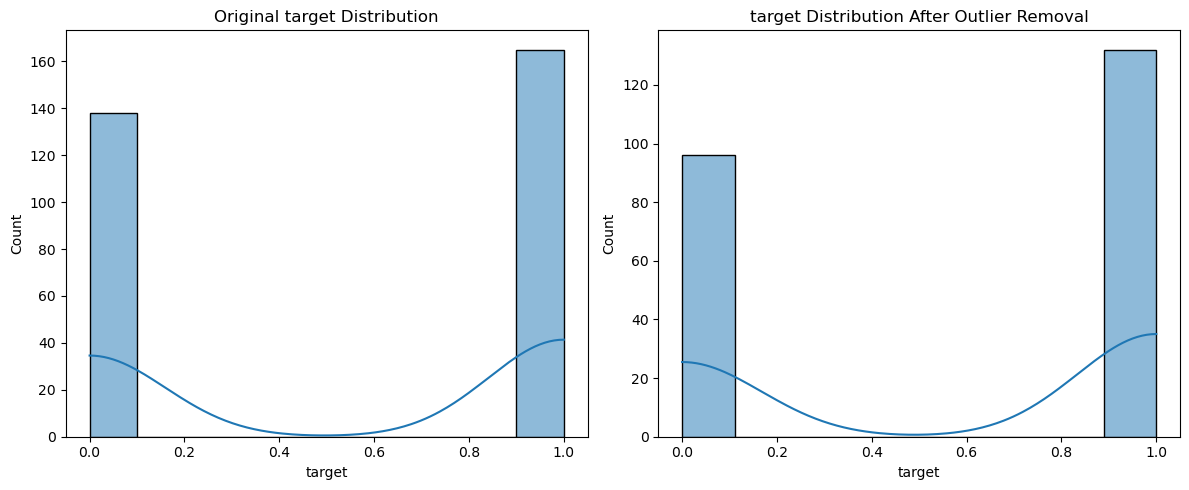


Original Data Summary:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std

In [43]:
def remove_outliers(df):
    df_clean = df.copy()
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    return df_clean

# Print original dataset shape
print("Original dataset shape:", df.shape)

# Remove outliers
df_no_outliers = remove_outliers(df)

# Print new dataset shape
print("Dataset shape after removing outliers:", df_no_outliers.shape)

# Function to plot histograms before and after outlier removal
def plot_histograms(df_original, df_clean, column):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df_original[column], kde=True)
    plt.title(f'Original {column} Distribution')
    
    plt.subplot(1, 2, 2)
    sns.histplot(df_clean[column], kde=True)
    plt.title(f'{column} Distribution After Outlier Removal')
    
    plt.tight_layout()
    plt.show()

# Plot histograms for each numeric column
numeric_columns = df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    plot_histograms(df, df_no_outliers, column)

# Compare summary statistics
print("\nOriginal Data Summary:")
print(df.describe())

print("\nData Summary After Outlier Removal:")
print(df_no_outliers.describe())

### Normalization ###

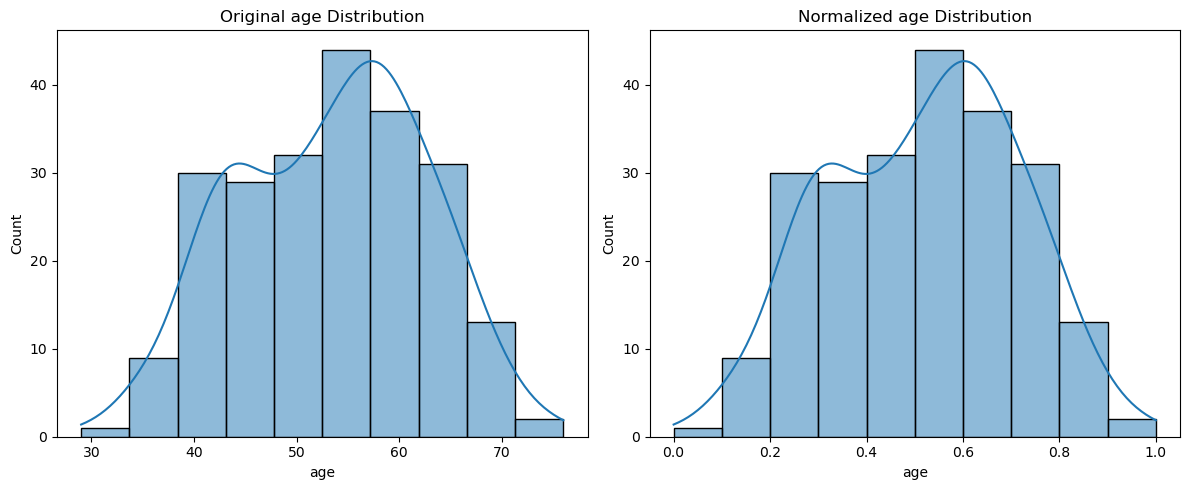

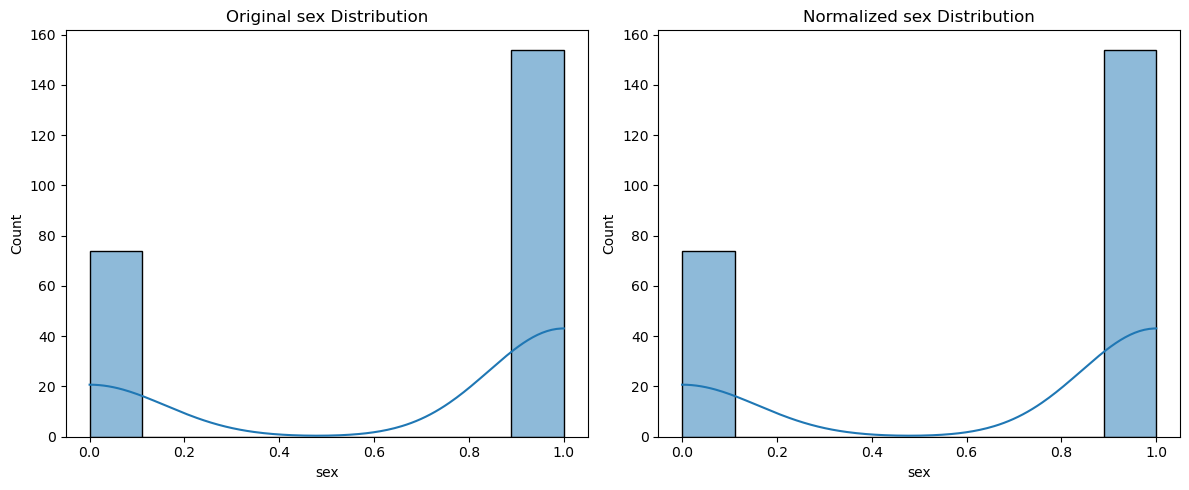

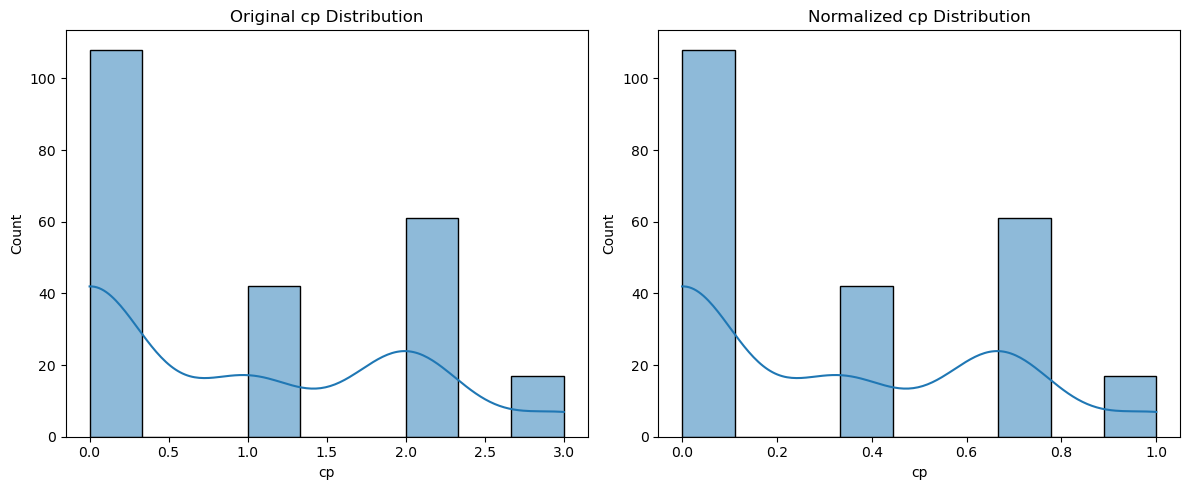

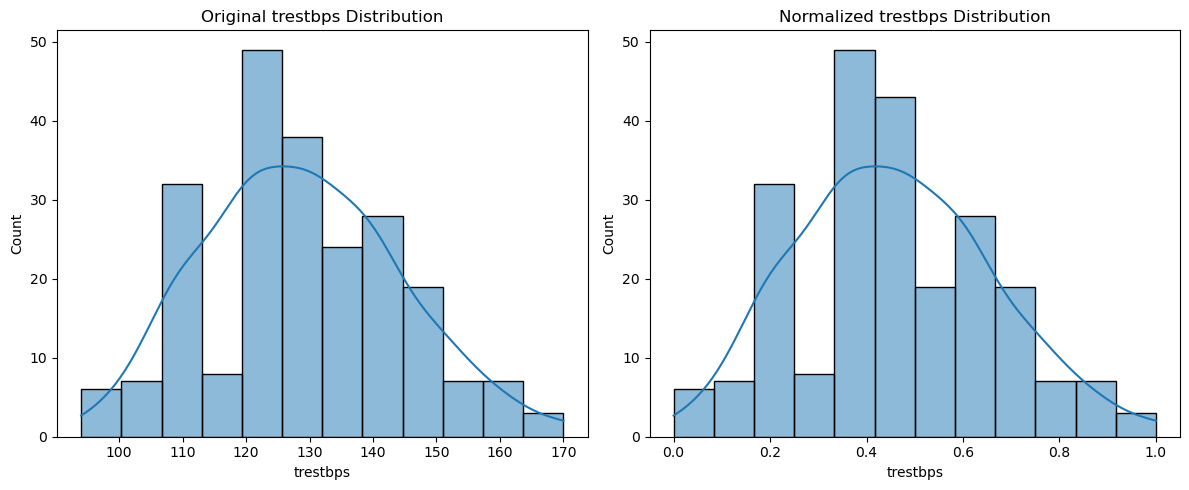

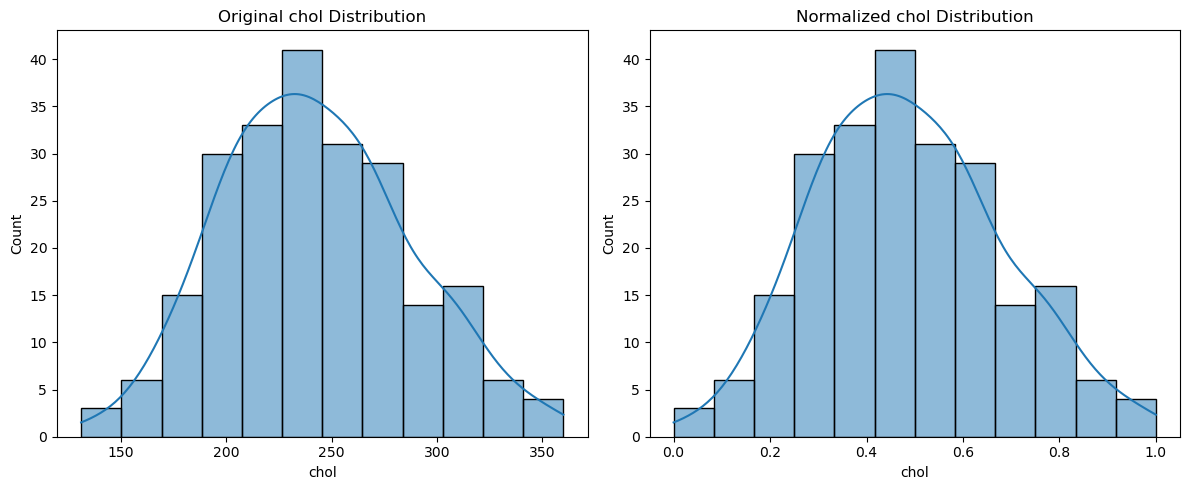

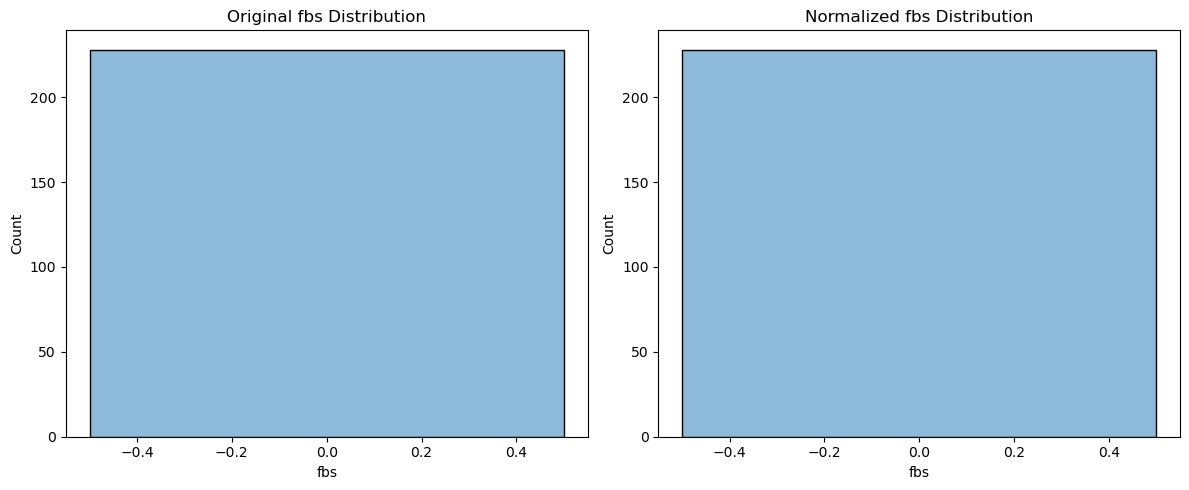

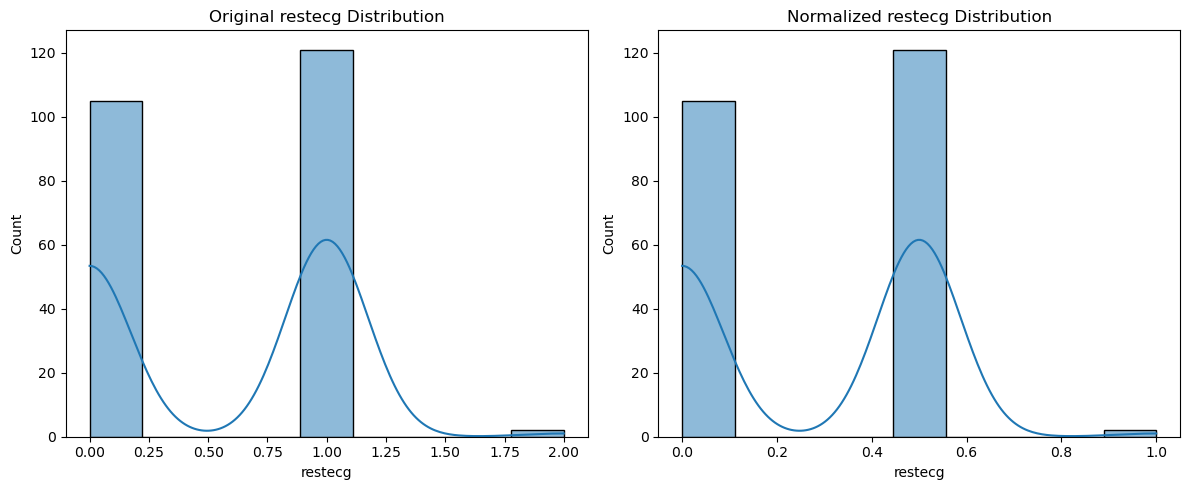

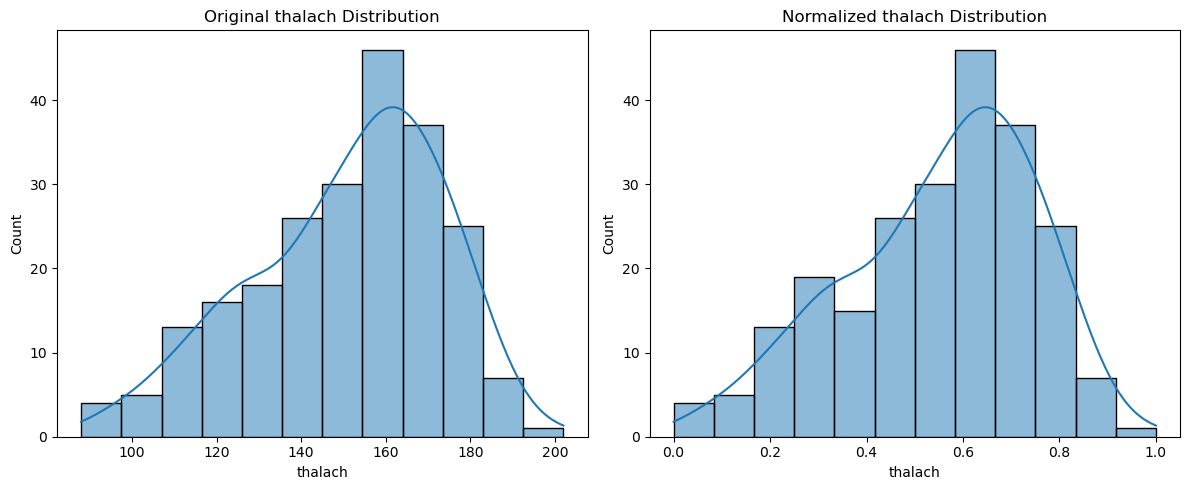

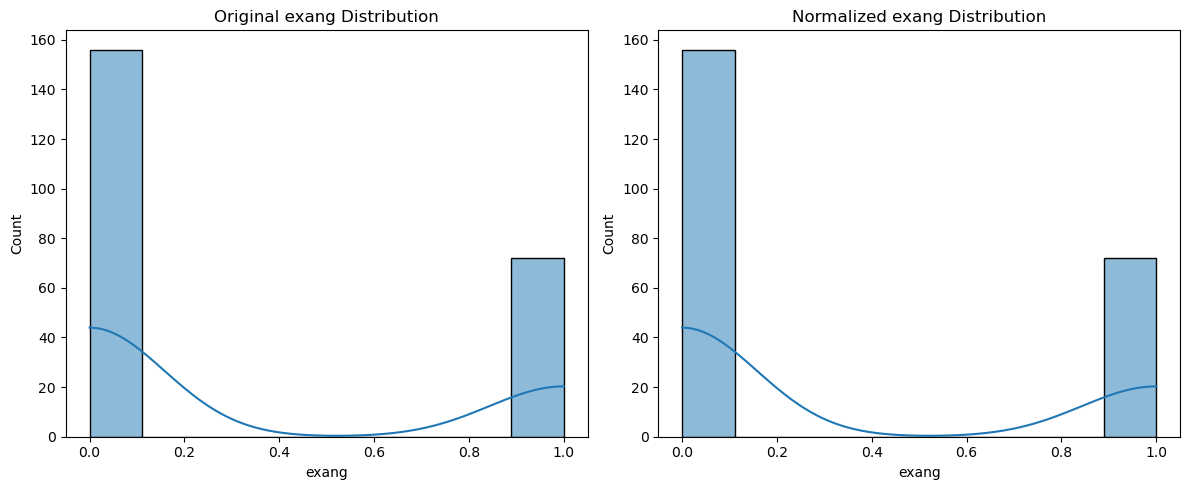

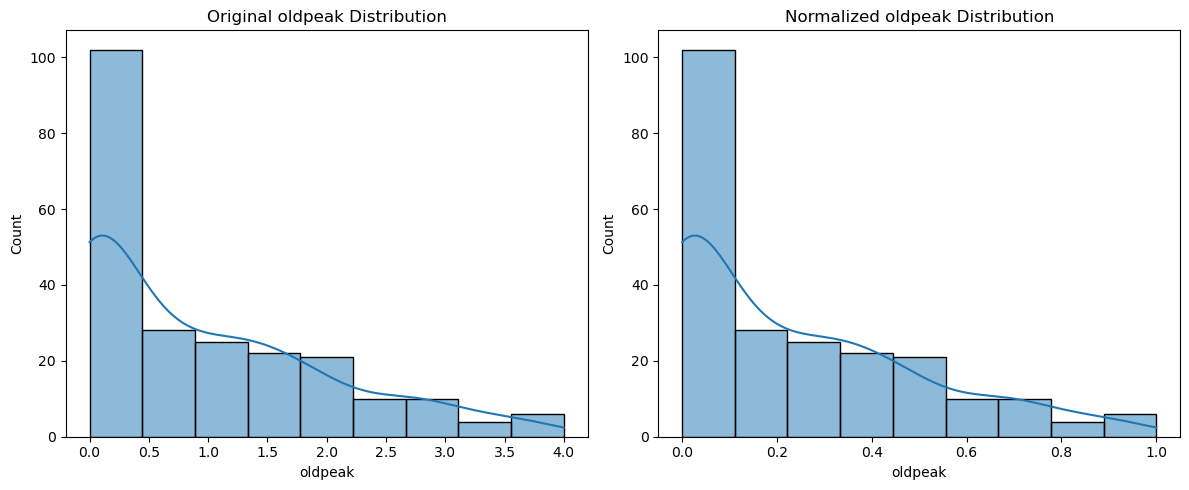

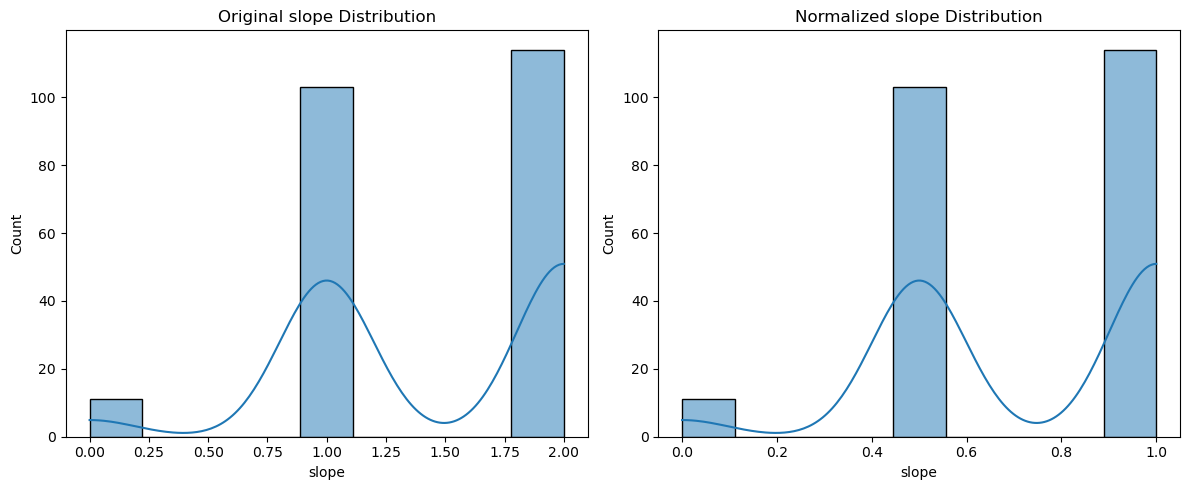

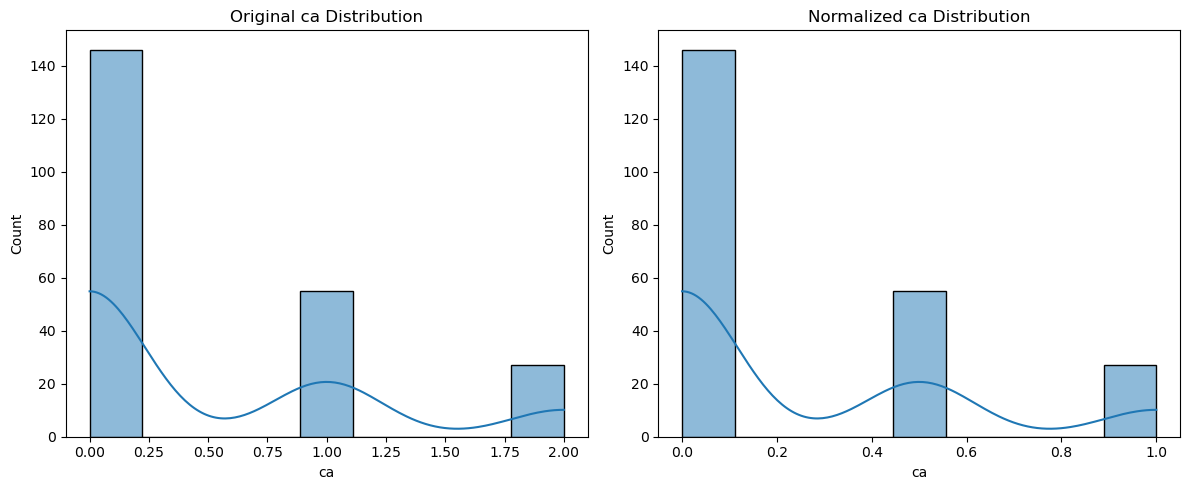

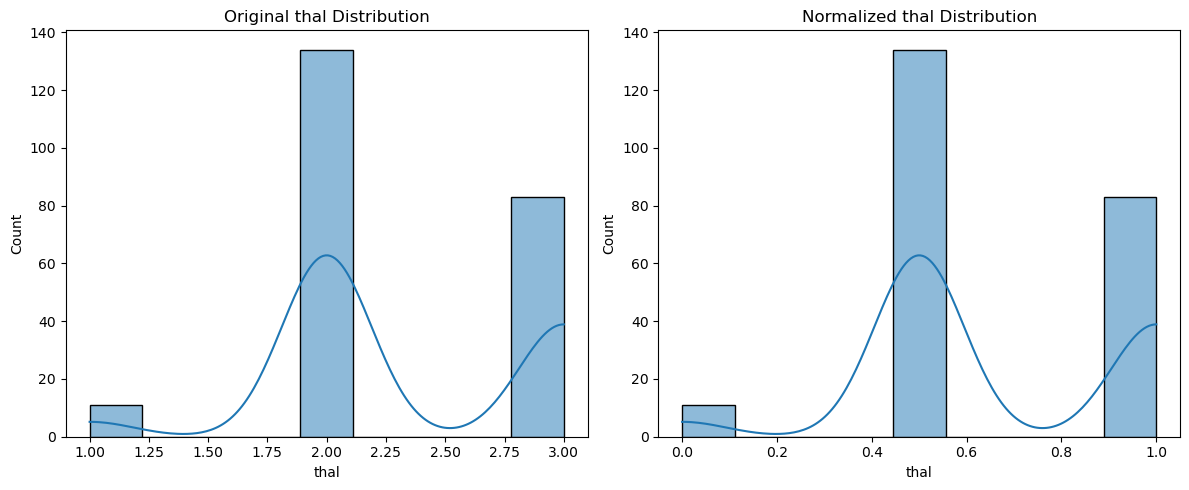

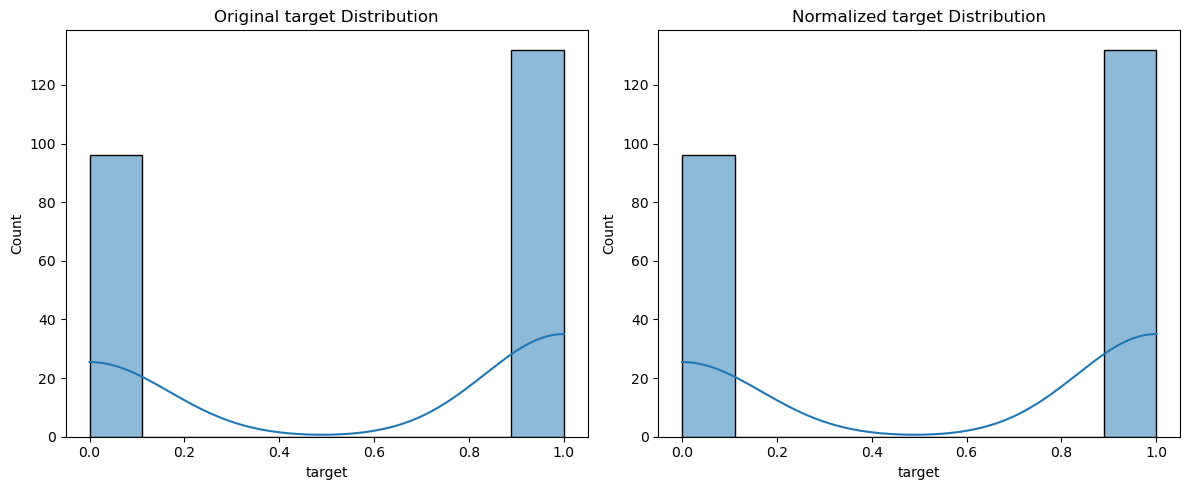


Data Summary After Outlier Removal:
              age         sex          cp    trestbps        chol    fbs  \
count  228.000000  228.000000  228.000000  228.000000  228.000000  228.0   
mean    53.333333    0.675439    0.942982  128.671053  242.372807    0.0   
std      9.229016    0.469241    1.020190   15.349142   44.329827    0.0   
min     29.000000    0.000000    0.000000   94.000000  131.000000    0.0   
25%     45.000000    0.000000    0.000000  120.000000  209.750000    0.0   
50%     54.000000    1.000000    1.000000  130.000000  239.000000    0.0   
75%     60.000000    1.000000    2.000000  140.000000  269.250000    0.0   
max     76.000000    1.000000    3.000000  170.000000  360.000000    0.0   

          restecg     thalach       exang     oldpeak       slope         ca  \
count  228.000000  228.000000  228.000000  228.000000  228.000000  228.00000   
mean     0.548246  151.070175    0.315789    0.946053    1.451754    0.47807   
std      0.516125   22.492963    0.465

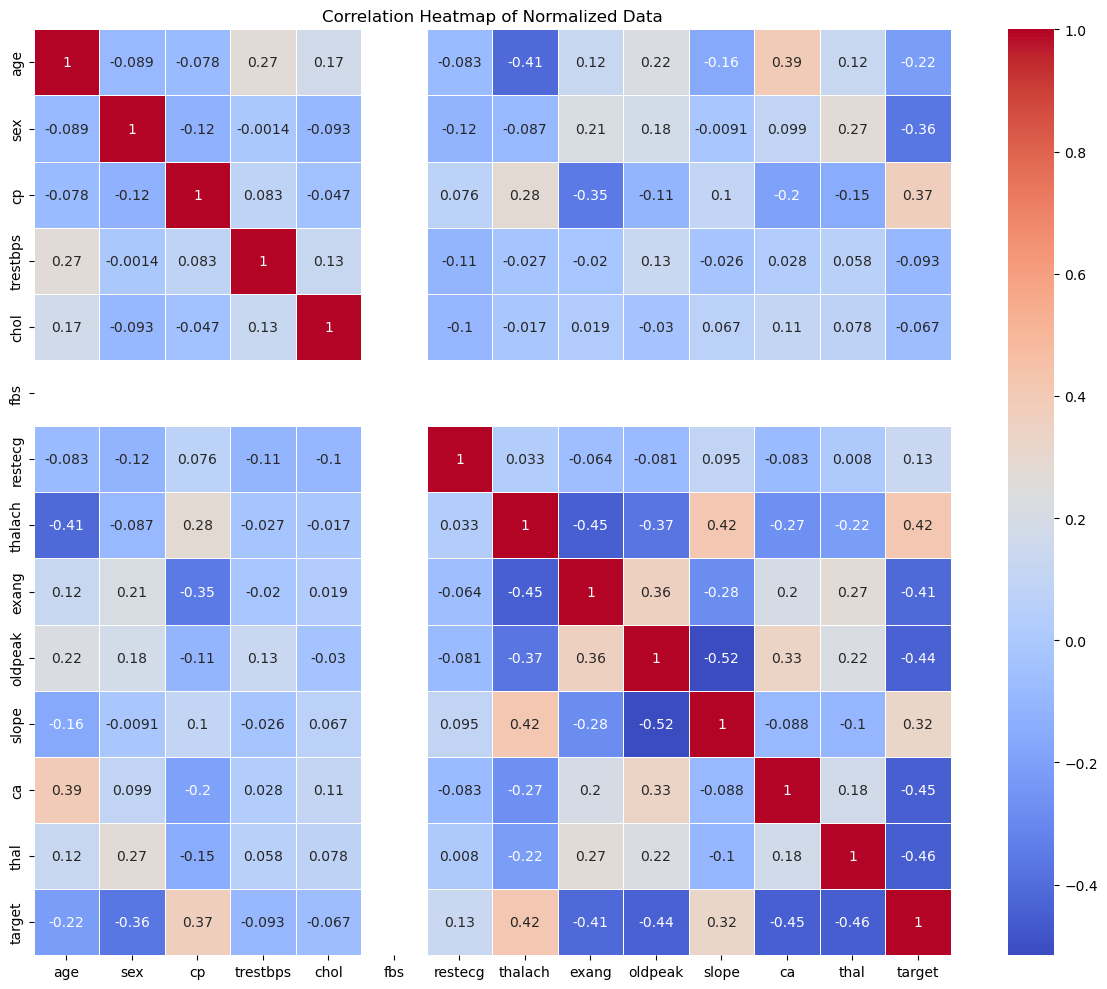

In [47]:
# Normalize the dataset
scaler = MinMaxScaler()
numeric_columns = df_no_outliers.select_dtypes(include=[np.number]).columns
df_normalized = df_no_outliers.copy()
df_normalized[numeric_columns] = scaler.fit_transform(df_no_outliers[numeric_columns])

# Function to plot distributions before and after normalization
def plot_distributions(df_original, df_normalized, column):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df_original[column], kde=True)
    plt.title(f'Original {column} Distribution')
    
    plt.subplot(1, 2, 2)
    sns.histplot(df_normalized[column], kde=True)
    plt.title(f'Normalized {column} Distribution')
    
    plt.tight_layout()
    plt.show()

# Plot distributions for each numeric column
for column in numeric_columns:
    plot_distributions(df_no_outliers, df_normalized, column)

# Compare summary statistics
print("\nData Summary After Outlier Removal:")
print(df_no_outliers.describe())

print("\nData Summary After Normalization:")
print(df_normalized.describe())

# Visualize correlations in normalized data
plt.figure(figsize=(12, 10))
sns.heatmap(df_normalized.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Normalized Data')
plt.tight_layout()
plt.show()

In [49]:
df_normalized.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Logistic Regressiom ##

In [52]:
# Separate features and target
X = df_normalized.drop('target', axis=1)
y = df_normalized['target']

In [54]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [58]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [60]:
# Print the model coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print("Model Coefficients:")
print(coefficients.sort_values('Coefficient', ascending=False))

Model Coefficients:
     Feature  Coefficient
2         cp     1.335196
7    thalach     1.198661
10     slope     1.050304
6    restecg     0.134646
5        fbs     0.000000
0        age    -0.097937
4       chol    -0.343673
3   trestbps    -0.490387
8      exang    -0.725119
9    oldpeak    -1.416346
1        sex    -1.427341
11        ca    -1.822126
12      thal    -2.037468


In [62]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.52      0.67        21
         1.0       0.71      0.96      0.81        25

    accuracy                           0.76        46
   macro avg       0.81      0.74      0.74        46
weighted avg       0.80      0.76      0.75        46



In [64]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Confusion Matrix:
[[11 10]
 [ 1 24]]


In [68]:
# Calculate ROC AUC score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc:.4f}")


ROC AUC Score: 0.9143


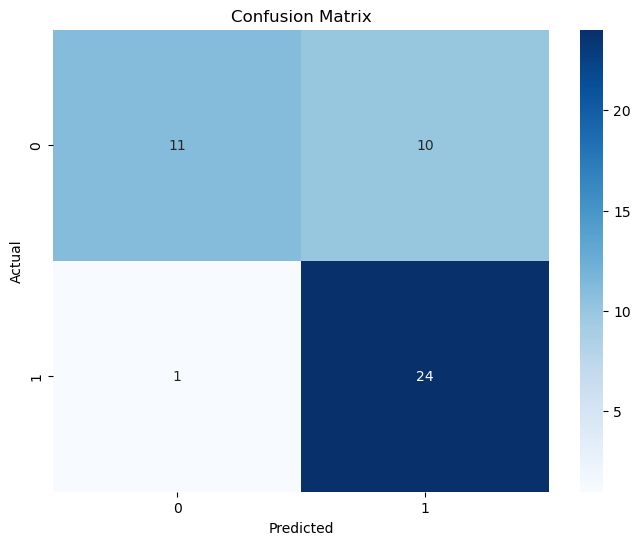

In [70]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

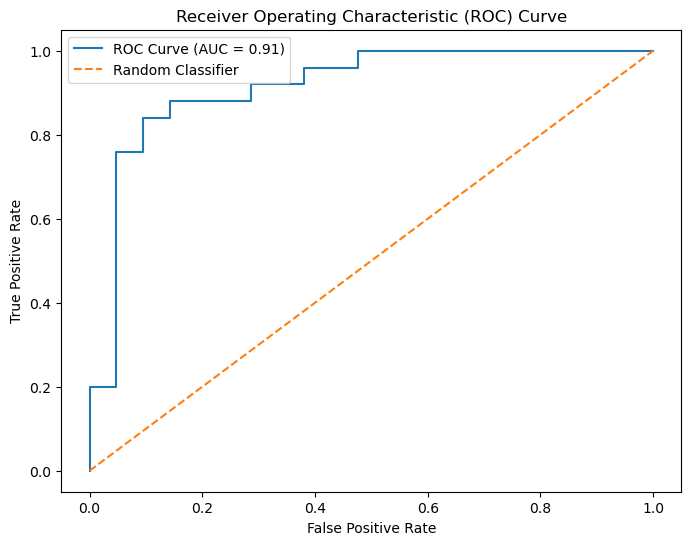

In [72]:
# Plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

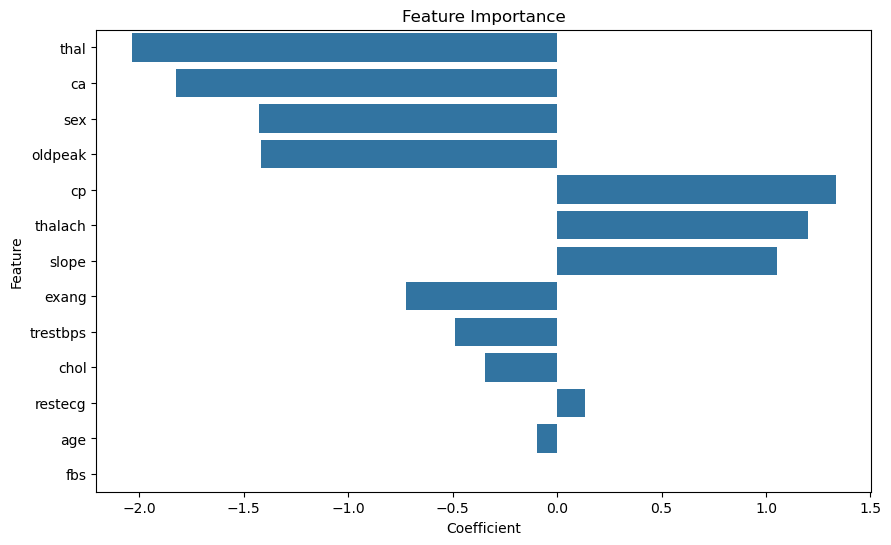

In [77]:
# Feature importance plot
plt.figure(figsize=(10, 6))
coefficients['abs_coef'] = abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values('abs_coef', ascending=False)
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance')
plt.show()

Out of 46 cases, the model correctly predicted:
    1. 11 out of 21 negative cases
    2. 24 out of 25 positive cases

The model performs better on the positive class with high recall (0.96)

The overall acurracy implies that the model correctly classifies 76% of all samples

### K-Nearest Neighbors ###

In [88]:
from sklearn.preprocessing import StandardScaler

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
param_grid = {'n_neighbors': range(1, 21)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)})

In [92]:
# Get the best model
best_knn = grid_search.best_estimator_

In [94]:
# Make predictions on the test set
y_pred = best_knn.predict(X_test_scaled)
y_pred_proba = best_knn.predict_proba(X_test_scaled)[:, 1]

In [96]:
# Print the best number of neighbors
print(f"Best number of neighbors: {grid_search.best_params_['n_neighbors']}")

Best number of neighbors: 18


In [98]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.57      0.73        21
         1.0       0.74      1.00      0.85        25

    accuracy                           0.80        46
   macro avg       0.87      0.79      0.79        46
weighted avg       0.86      0.80      0.79        46



In [100]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Confusion Matrix:
[[12  9]
 [ 0 25]]


In [102]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc:.4f}")


ROC AUC Score: 0.8924


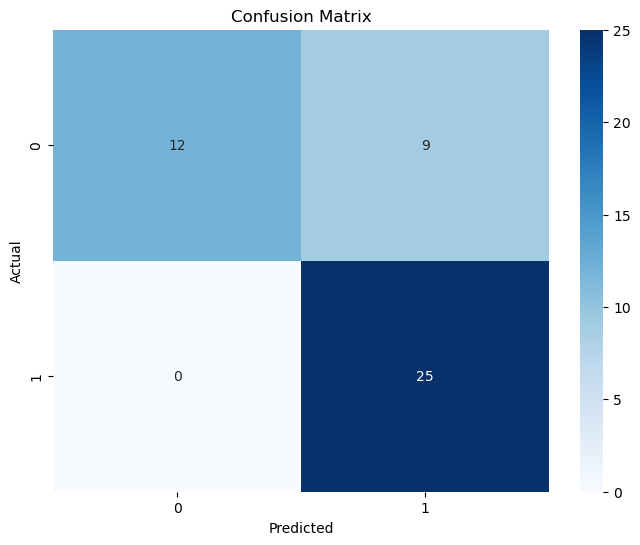

In [104]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

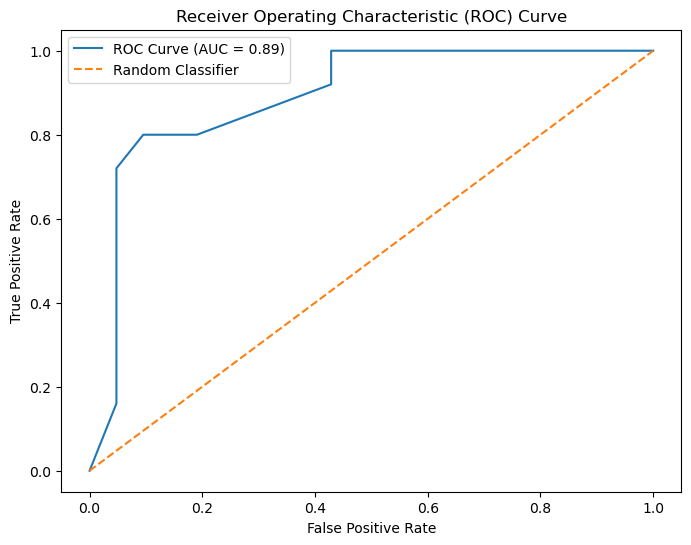

In [106]:
# Plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

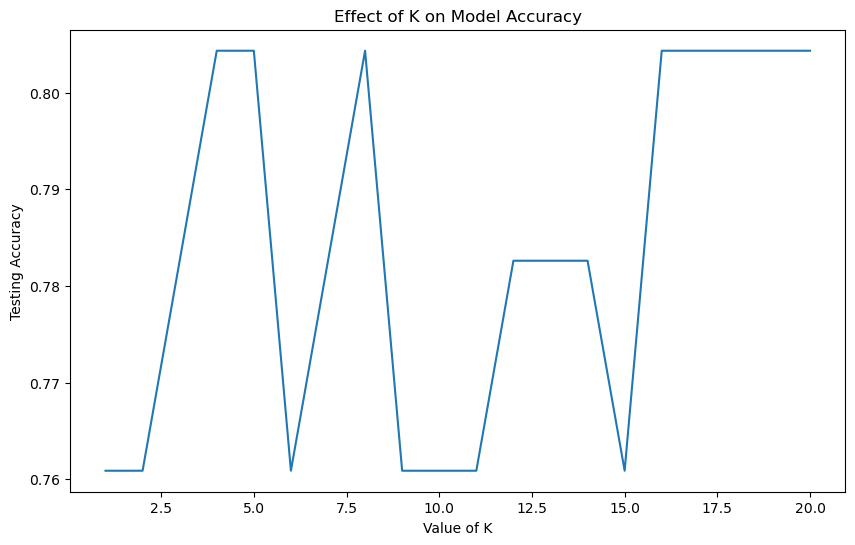

In [108]:
# Plot the effect of k on the model's performance
k_range = range(1, 21)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    k_scores.append(knn.score(X_test_scaled, y_test))

plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K')
plt.ylabel('Testing Accuracy')
plt.title('Effect of K on Model Accuracy')
plt.show()

The K-Nearest Neighbors model correctly predicted 12 negative out of 21 cases and correctly predicted all 25 positive cases

The overall accuracy for the model was 80.43%

### Support Vector Machine ###

In [114]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

In [116]:
# Create and train the SVM model using GridSearchCV
svm = SVC(random_state=42, probability=True)
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_svm = grid_search.best_estimator_


In [118]:
# Make predictions on the test set
y_pred = best_svm.predict(X_test_scaled)
y_pred_proba = best_svm.predict_proba(X_test_scaled)[:, 1]

In [120]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

Best Hyperparameters:
{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [122]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.57      0.71        21
         1.0       0.73      0.96      0.83        25

    accuracy                           0.78        46
   macro avg       0.83      0.77      0.77        46
weighted avg       0.82      0.78      0.77        46



In [124]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Confusion Matrix:
[[12  9]
 [ 1 24]]


In [126]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc:.4f}")


ROC AUC Score: 0.8933


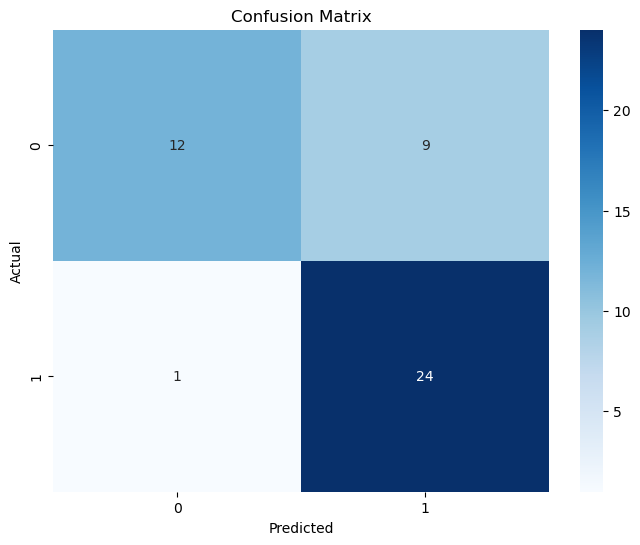

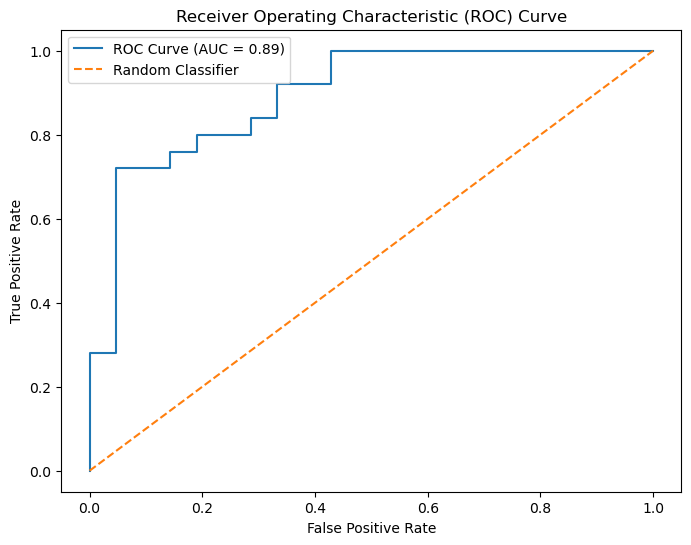

In [128]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

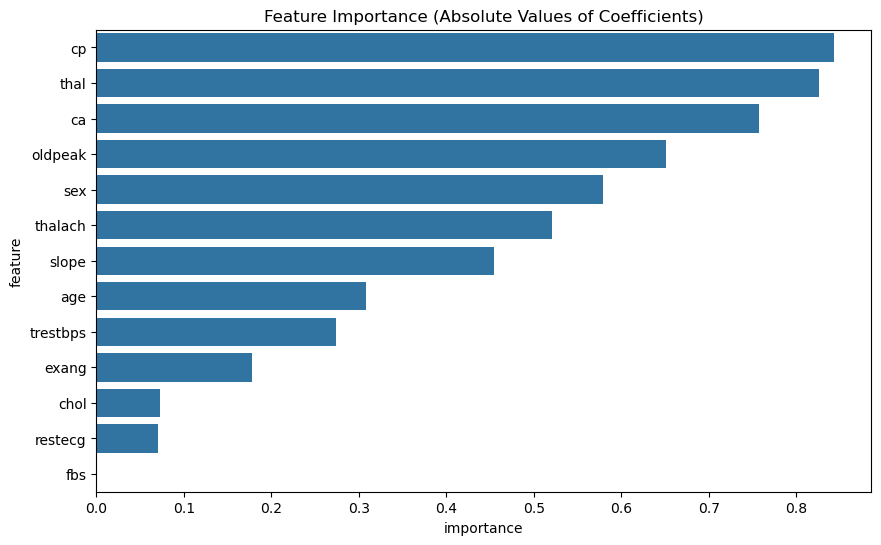

In [130]:
if best_svm.kernel == 'linear':
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': np.abs(best_svm.coef_[0])
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title('Feature Importance (Absolute Values of Coefficients)')
    plt.show()

The model correctly predicted 12 negative cases and correctly predicted 24 positive cases.

The accuracy for the SVM was 78.26%

### Decision Tree ###

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [137]:
# Create and train the Decision Tree model using GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [139]:
# Get the best model
best_dt = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_dt.predict(X_test_scaled)
y_pred_proba = best_dt.predict_proba(X_test_scaled)[:, 1]

In [141]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)


Best Hyperparameters:
{'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [143]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.43      0.58        21
         1.0       0.67      0.96      0.79        25

    accuracy                           0.72        46
   macro avg       0.78      0.69      0.68        46
weighted avg       0.77      0.72      0.69        46


Confusion Matrix:
[[ 9 12]
 [ 1 24]]


In [145]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc:.4f}")


ROC AUC Score: 0.7248


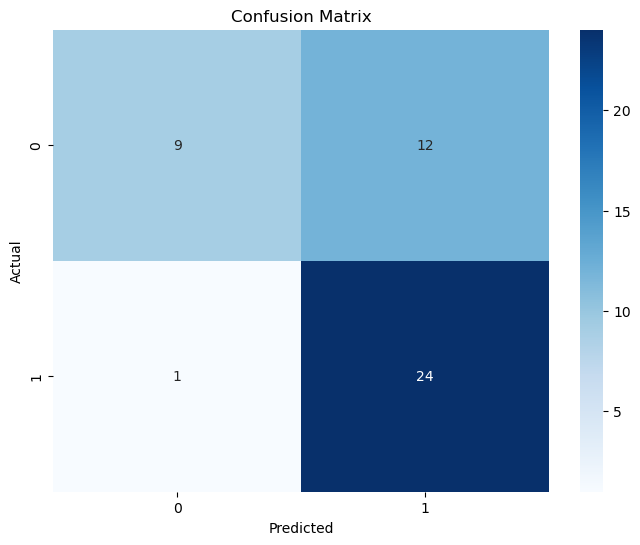

In [147]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

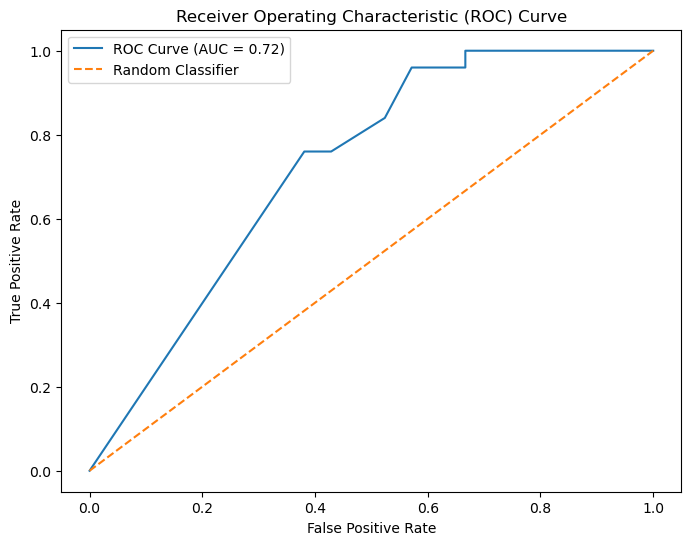

In [149]:
# Plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

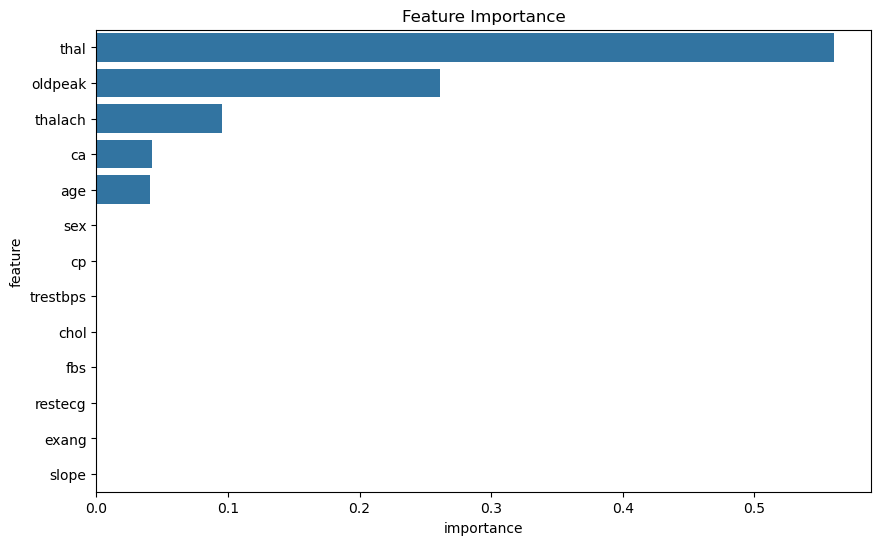

In [151]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_dt.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

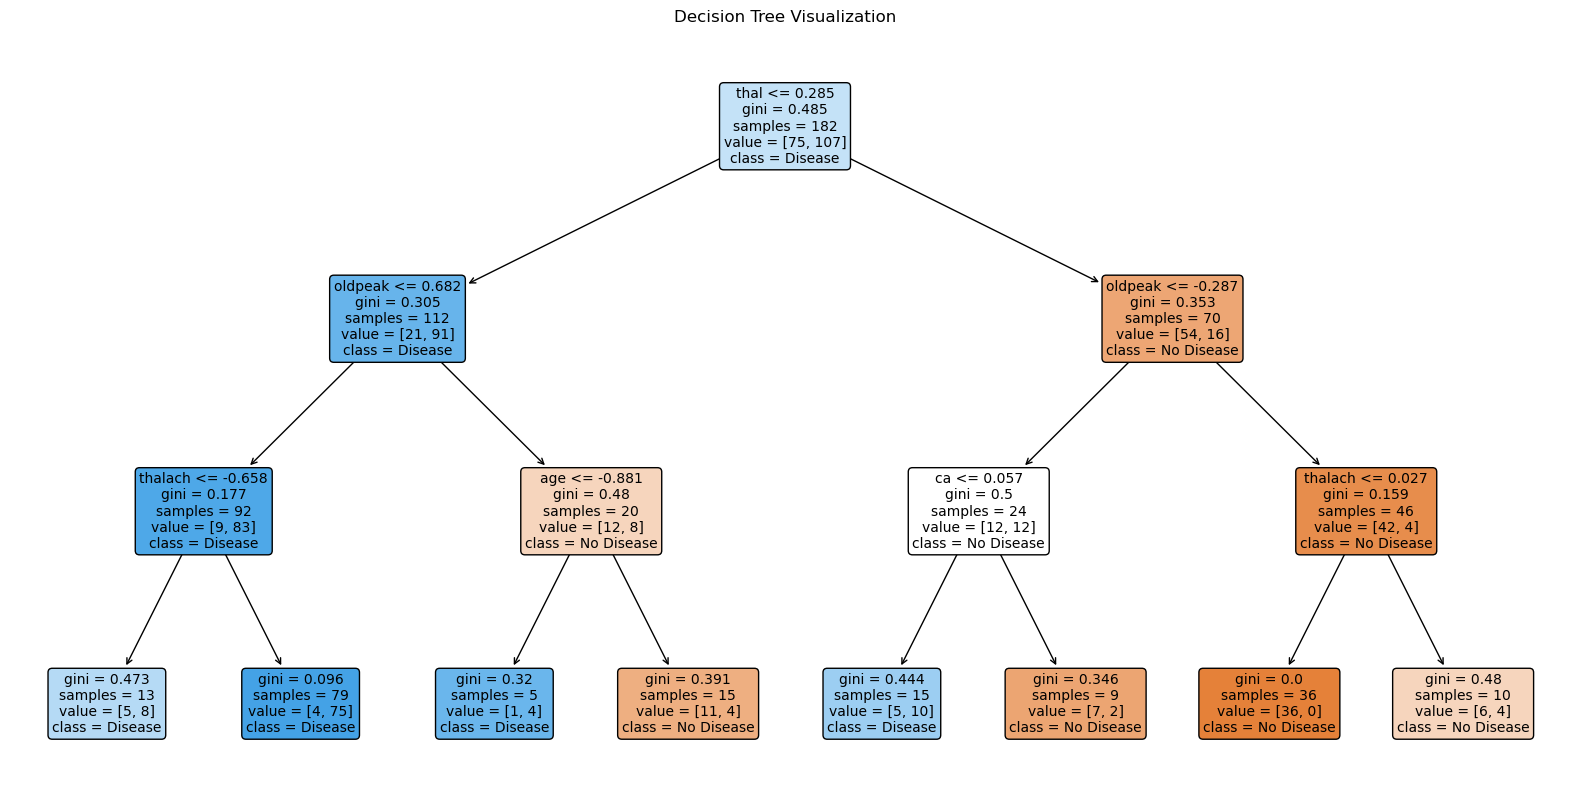

In [155]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt, feature_names=X.columns, class_names=['No Disease', 'Disease'], 
          filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

The model correctly predicted 9 negative cases and correctly predicted 24 positive cases.

The model had an overall accuracy of 71.74%

### Random Forest ###

In [160]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [162]:
# Create and train the Random Forest model using RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=100, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)


C:\Users\lalde\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
245 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
143 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lalde\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lalde\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\lalde\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\lalde\anaconda3\Lib\site-packag

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42)

In [164]:
# Get the best model
best_rf = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(X_test_scaled)
y_pred_proba = best_rf.predict_proba(X_test_scaled)[:, 1]


In [166]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(random_search.best_params_)


Best Hyperparameters:
{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}


In [168]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.52      0.69        21
         1.0       0.71      1.00      0.83        25

    accuracy                           0.78        46
   macro avg       0.86      0.76      0.76        46
weighted avg       0.84      0.78      0.77        46


Confusion Matrix:
[[11 10]
 [ 0 25]]


In [170]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc:.4f}")


ROC AUC Score: 0.9105


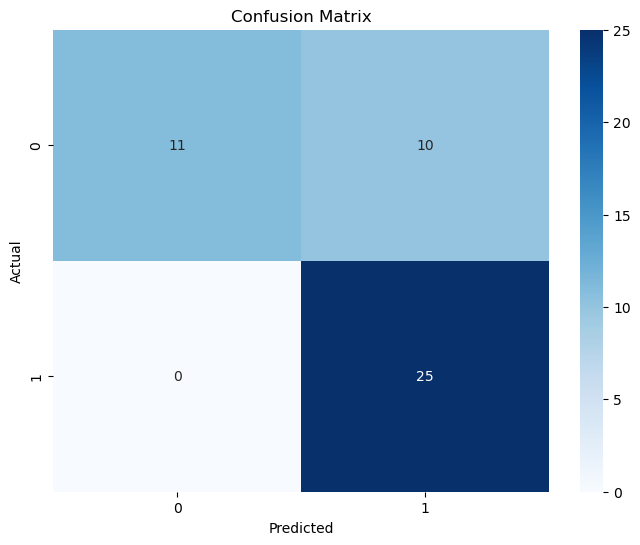

In [172]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

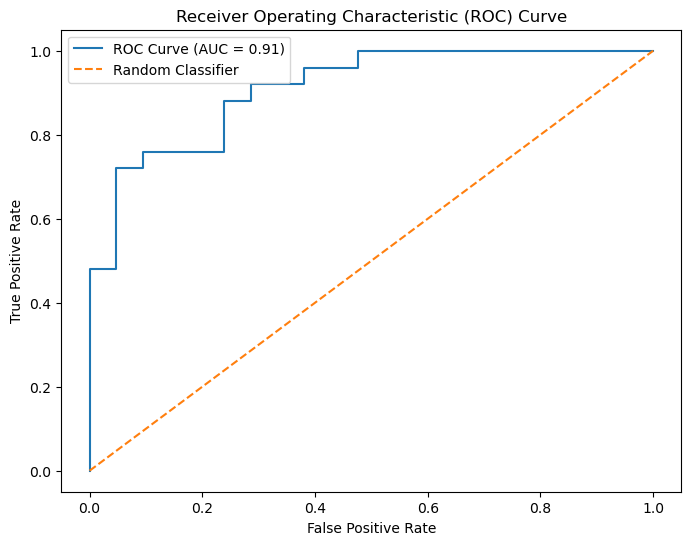

In [174]:
# Plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

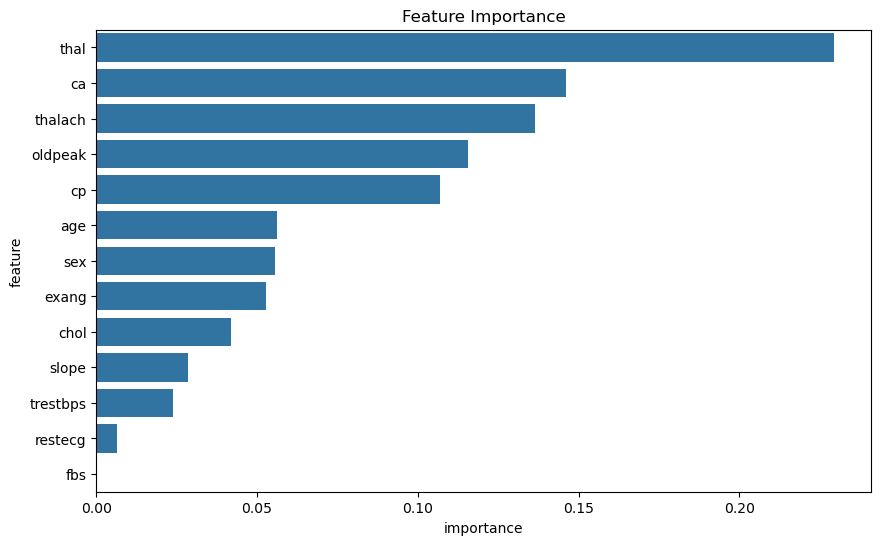

In [176]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

The model correctly predicted 11 negative cases and correctly predicted all 25 positive cases

The model had an overall accuracy of 78 percent

### Results and Interpretation ###

Interpretation:

**Accuracy**:

KNN and Random Forest tie for the highest accuracy (0.804)
SVM and Random Forest tie for second (0.783)
Logistic Regression (0.761)
Decision Tree has the lowest accuracy (0.717)

**Sensitivity** (Recall for Class 1):

KNN and Random Forest achieve perfect sensitivity (1.000)
Logistic Regression, SVM, and Decision Tree tie (0.960)

**Specificity** (Recall for Class 0):

KNN and SVM tie for the highest (0.571)
Logistic Regression and Random Forest tie (0.524)
Decision Tree has the lowest (0.429)

**Precision** for Class 1 (Disease):

SVM has the highest (0.727)
Random Forest (0.714)
Logistic Regression (0.706)
Decision Tree has the lowest (0.667)

**F1-Score** for Class 1 (Disease):

KNN has the highest (0.847)
Random Forest (0.833)
SVM (0.827)
Logistic Regression (0.814)
Decision Tree has the lowest (0.787)
Overall observations:

KNN and Random Forest perform the best overall, with perfect sensitivity and the highest accuracy.
SVM shows balanced performance across metrics.
Logistic Regression performs reasonably well across all metrics.
The Decision Tree model underperforms compared to the other algorithms, particularly in specificity.
Recommendations:

For this heart disease prediction task, the **KNN** or **Random Forest** models appear to be the best choices, especially if minimizing false negatives (missed disease cases) is a priority.
If model interpretability is important, Random Forest might be preferred over KNN, as it provides feature importance.
SVM could be a good alternative if you want a balance between performance and potential for handling non-linear relationships in the data.
The simpler Logistic Regression model performs surprisingly well and could be considered if you need a highly interpretable model.
The Decision Tree model, while highly interpretable, doesn't perform as well as the other models and might not be the best choice for this particular dataset.

### Next Steps ###

**Feature Engineering**:
- Create interaction between existing features, especially those that show high importance within the models

**Feature Selection**:
- Use Recursive Feature Elimination (RFE) or Lasso regularization to identify important features

**Handling Class Imbalance**
- Try techniques like SMOTE or ADASYN to balance classes.

**Ensemble Methods**
- Implement stacking of best-performing models

**Cross-Validation**
- Implement k-fold cross-validation to get a more robust estimate of model performance